In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 5.1MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_file
import pandas as pd

In [4]:
!unzip -q "/content/gdrive/My Drive/GL_AIML/Kaggle/rsna-pneumonia-detection-challenge.zip"

In [5]:
train_files_path = '/content/stage_2_train_images'
test_files_path = '/content/stage_2_test_images'

In [6]:
import os
train_file_names = os.listdir(train_files_path)
test_file_names = os.listdir(test_files_path)

In [7]:
print('Number of training images we have: '+ str(len(train_file_names)))
print('Number of testing images we have: '+ str(len(test_file_names)))

Number of training images we have: 26684
Number of testing images we have: 3000


In [8]:
train_patient_ids = []
for file_name in train_file_names:
    name,extn = file_name.split('.')
    train_patient_ids.append(name)
    if(extn != 'dcm'):
        print(name+' is not a dcm file')

In [9]:
train_patient_ids[0:5]

['1a9c4cb9-c796-4174-9414-ca3d653b0d5c',
 '88f2bcae-b626-4645-93e7-517f893c3f7d',
 '6c0341ef-950c-45c1-9009-777d893e8060',
 '38b147a7-352b-4adb-88b5-2449d362acae',
 'de7f8bd9-2892-4bd0-bc3c-dc0bf24370b6']

In [10]:
test_patient_ids = []
for file_name in test_file_names:
    name,extn = file_name.split('.')
    test_patient_ids.append(name)
    if(extn != 'dcm'):
        print(name+' is not a dcm file')

In [11]:
test_patient_ids[0:5]

['2bf2fa51-11fe-4b7d-afa1-3b373fa2384d',
 '143cc465-80b8-484c-ba71-ad362ea8fd90',
 '1fd5a4d2-b0f2-4d58-bdd9-0dd1862a523f',
 'c13837b3-8a12-4cb3-98fd-4ff007df6aba',
 '2950b52f-0d4e-4c6b-ad7e-7052b750bf9b']

In [12]:
train_patient_ids.sort()
test_patient_ids.sort()

In [13]:
train_patient_ids[0:5]

['0004cfab-14fd-4e49-80ba-63a80b6bddd6',
 '000924cf-0f8d-42bd-9158-1af53881a557',
 '000db696-cf54-4385-b10b-6b16fbb3f985',
 '000fe35a-2649-43d4-b027-e67796d412e0',
 '001031d9-f904-4a23-b3e5-2c088acd19c6']

In [14]:
test_patient_ids[0:5]

['0000a175-0e68-4ca4-b1af-167204a7e0bc',
 '0005d3cc-3c3f-40b9-93c3-46231c3eb813',
 '000686d7-f4fc-448d-97a0-44fa9c5d3aa6',
 '000e3a7d-c0ca-4349-bb26-5af2d8993c3d',
 '00100a24-854d-423d-a092-edcf6179e061']

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_file
import pandas as pd

1a9c4cb9-c796-4174-9414-ca3d653b0d5c.dcm


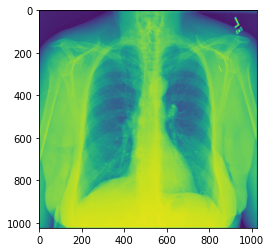

In [16]:
train_example1 =  pydicom.dcmread(train_files_path+'/'+train_file_names[0])
print(train_file_names[0])
plt.imshow(train_example1.pixel_array)

In [17]:
print(train_example1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.21726.1517874435.911101
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.21726.1517874435.911101
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

4e7c822d-0df2-4d75-a3a4-d15962d90a18.dcm


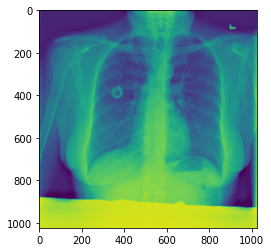

In [18]:
train_example2 =  pydicom.dcmread(train_files_path+'/'+train_file_names[8])
print(train_file_names[8])
plt.imshow(train_example2.pixel_array)

In [19]:
print(train_example2)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.15436.1517874385.648249
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.15436.1517874385.648249
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

0927e819-9640-487d-a04e-f5d4732dbe0a.dcm


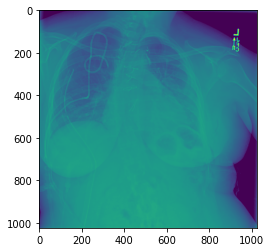

In [20]:
train_example3 =  pydicom.dcmread(train_files_path+'/'+train_file_names[14])
print(train_file_names[14])
plt.imshow(train_example3.pixel_array)

In [21]:
print(train_example3)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.20518.1517874428.513244
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.20518.1517874428.513244
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [22]:
train_male_count = 0
train_female_count = 0
train_gender_data = []
train_age_data = []
for file_name in train_patient_ids:
    train_example =  pydicom.dcmread(train_files_path+'/'+file_name+'.dcm')
    train_gender_data.append(train_example[0x0010,0x0040].value)
    train_age_data.append(train_example[0x0010,0x1010].value)
    if(train_example[0x0010,0x0040].value == 'M'):
        train_male_count = train_male_count + 1
    if(train_example[0x0010,0x0040].value == 'F'):
        train_female_count = train_female_count + 1

In [23]:
print('Number of male patients in training set:'+str(train_male_count))
print('Number of female patients in training set:'+str(train_female_count))
print('Total number of patients in training set:'+str(train_male_count+train_female_count))

Number of male patients in training set:15166
Number of female patients in training set:11518
Total number of patients in training set:26684


In [24]:
test_male_count = 0
test_female_count = 0
test_gender_data = []
test_age_data = []
for file_name in test_patient_ids:
    test_example =  pydicom.dcmread(test_files_path+'/'+file_name+'.dcm')
    test_gender_data.append(test_example[0x0010,0x0040].value)
    test_age_data.append(test_example[0x0010,0x1010].value)
    if(test_example[0x0010,0x0040].value == 'M'):
        test_male_count = test_male_count + 1
    if(test_example[0x0010,0x0040].value == 'F'):
        test_female_count = test_female_count + 1

In [25]:
print('Number of male patients in testing set:'+str(test_male_count))
print('Number of female patients in testing set:'+str(test_female_count))
print('Total number of patients in testing set:'+str(test_male_count+test_female_count))

Number of male patients in testing set:1714
Number of female patients in testing set:1286
Total number of patients in testing set:3000


In [26]:
train_values_g = [train_male_count,train_female_count]
test_values_g = [test_male_count,test_female_count]

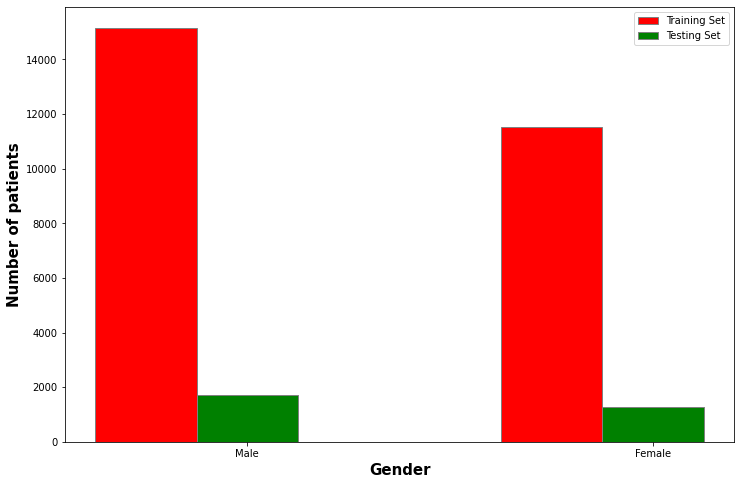

In [27]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(train_values_g))
br2 = [x + barWidth for x in br1]
plt.bar(br1, train_values_g, color ='r', width = barWidth,
        edgecolor ='grey', label ='Training Set')
plt.bar(br2, test_values_g, color ='g', width = barWidth,
        edgecolor ='grey', label ='Testing Set')
plt.xlabel('Gender', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of patients', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_values_g))],
        ['Male','Female'])
plt.legend()

In [28]:
print("Percentage of Males data in training set:"+str(100*train_male_count/(train_male_count+train_female_count)))
print("Percentage of Females data in training set:"+str(100*train_female_count/(train_male_count+train_female_count)))

Percentage of Males data in training set:56.835556888022786
Percentage of Females data in training set:43.164443111977214


In [29]:
print("Percentage of Males data in testing set:"+str(100*test_male_count/(test_male_count+test_female_count)))
print("Percentage of Females data in testing set:"+str(100*test_female_count/(test_male_count+test_female_count)))

Percentage of Males data in testing set:57.13333333333333
Percentage of Females data in testing set:42.86666666666667


In [30]:
train_labels_df = pd.read_csv('/content/stage_2_train_labels.csv',index_col = 'patientId')

In [31]:
train_labels_df.sort_values("patientId", inplace = True)

In [32]:
train_labels_df.head(10)

,x,y,width,height,Target
patientId,,,,,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
000924cf-0f8d-42bd-9158-1af53881a557,NaN,NaN,NaN,NaN,0
000db696-cf54-4385-b10b-6b16fbb3f985,316.0,318.0,170.0,478.0,1
000db696-cf54-4385-b10b-6b16fbb3f985,660.0,375.0,146.0,402.0,1
000fe35a-2649-43d4-b027-e67796d412e0,570.0,282.0,269.0,409.0,1
000fe35a-2649-43d4-b027-e67796d412e0,83.0,227.0,296.0,438.0,1
001031d9-f904-4a23-b3e5-2c088acd19c6,66.0,160.0,373.0,608.0,1
001031d9-f904-4a23-b3e5-2c088acd19c6,552.0,164.0,376.0,676.0,1
0010f549-b242-4e94-87a8-57d79de215fc,NaN,NaN,NaN,NaN,0


In [33]:
train_labels_df.shape

(30227, 5)

In [34]:
train_labels_classinfo = pd.read_csv('stage_2_detailed_class_info.csv',index_col = 'patientId')

In [35]:
train_labels_classinfo.sort_values("patientId", inplace = True)

In [36]:
train_labels_classinfo.head(10)

,class
patientId,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
000924cf-0f8d-42bd-9158-1af53881a557,Normal
000db696-cf54-4385-b10b-6b16fbb3f985,Lung Opacity
000db696-cf54-4385-b10b-6b16fbb3f985,Lung Opacity
000fe35a-2649-43d4-b027-e67796d412e0,Lung Opacity
000fe35a-2649-43d4-b027-e67796d412e0,Lung Opacity
001031d9-f904-4a23-b3e5-2c088acd19c6,Lung Opacity
001031d9-f904-4a23-b3e5-2c088acd19c6,Lung Opacity
0010f549-b242-4e94-87a8-57d79de215fc,Normal


In [37]:
train_labels_classinfo.shape

(30227, 1)

In [38]:
train_labels_df['class'] = train_labels_classinfo['class']

In [39]:
train_labels_df.shape

(30227, 6)

In [40]:
train_labels_df.head(10)

,x,y,width,height,Target,class
patientId,,,,,,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
000924cf-0f8d-42bd-9158-1af53881a557,NaN,NaN,NaN,NaN,0,Normal
000db696-cf54-4385-b10b-6b16fbb3f985,316.0,318.0,170.0,478.0,1,Lung Opacity
000db696-cf54-4385-b10b-6b16fbb3f985,660.0,375.0,146.0,402.0,1,Lung Opacity
000fe35a-2649-43d4-b027-e67796d412e0,570.0,282.0,269.0,409.0,1,Lung Opacity
000fe35a-2649-43d4-b027-e67796d412e0,83.0,227.0,296.0,438.0,1,Lung Opacity
001031d9-f904-4a23-b3e5-2c088acd19c6,66.0,160.0,373.0,608.0,1,Lung Opacity
001031d9-f904-4a23-b3e5-2c088acd19c6,552.0,164.0,376.0,676.0,1,Lung Opacity
0010f549-b242-4e94-87a8-57d79de215fc,NaN,NaN,NaN,NaN,0,Normal


In [41]:
train_labels_df.loc[str(train_patient_ids[2])].shape

(2, 6)

In [42]:
k=train_labels_df.loc[str(train_patient_ids[6])].values

In [43]:
k

array([198.0, 375.0, 114.0, 206.0, 1, 'Lung Opacity'], dtype=object)

In [44]:
from matplotlib.patches import Rectangle
def disp_xray(patient_id):
    train_example =  pydicom.dcmread(train_files_path+'/'+patient_id+'.dcm')
    print('Patient Id is :'+patient_id)
    plt.imshow(train_example.pixel_array,cmap='gray')
    if(train_labels_df.loc[str(patient_id)].shape == (6,)):
        if(train_labels_df.loc[str(patient_id)].Target == 1):
            roi = train_labels_df.loc[str(patient_id)].values
            plt.gca().add_patch(Rectangle((roi[0],roi[1]),roi[2],roi[3],linewidth=2,edgecolor='r',facecolor='none'))
    if(train_labels_df.loc[str(patient_id)].shape == (2,6)):
        roi = train_labels_df.loc[str(patient_id)].values
        plt.gca().add_patch(Rectangle((roi[0,0],roi[0,1]),roi[0,2],roi[0,3],linewidth=2,edgecolor='r',facecolor='none'))
        plt.gca().add_patch(Rectangle((roi[1,0],roi[1,1]),roi[1,2],roi[1,3],linewidth=2,edgecolor='r',facecolor='none'))

Patient Id is :0004cfab-14fd-4e49-80ba-63a80b6bddd6


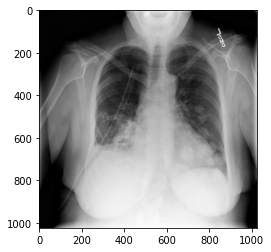

In [45]:
disp_xray(str(train_patient_ids[0]))

Patient Id is :000924cf-0f8d-42bd-9158-1af53881a557


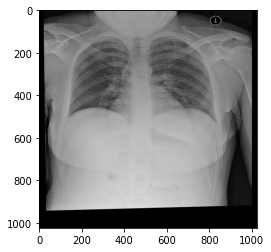

In [46]:
disp_xray(str(train_patient_ids[1]))

Patient Id is :000db696-cf54-4385-b10b-6b16fbb3f985


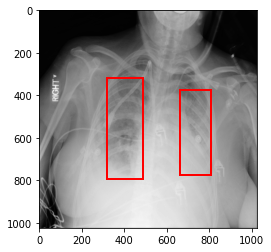

In [47]:
disp_xray(str(train_patient_ids[2]))

Patient Id is :000fe35a-2649-43d4-b027-e67796d412e0


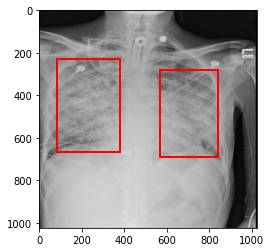

In [48]:
disp_xray(str(train_patient_ids[3]))

Patient Id is :001031d9-f904-4a23-b3e5-2c088acd19c6


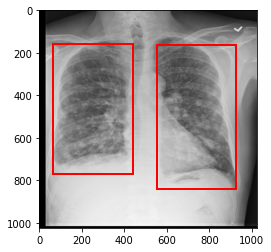

In [49]:
disp_xray(str(train_patient_ids[4]))

Patient Id is :0010f549-b242-4e94-87a8-57d79de215fc


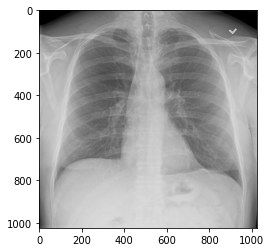

In [50]:
disp_xray(str(train_patient_ids[5]))

Patient Id is :001916b8-3d30-4935-a5d1-8eaddb1646cd


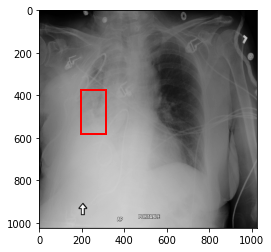

In [51]:
disp_xray(str(train_patient_ids[6]))

In [52]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


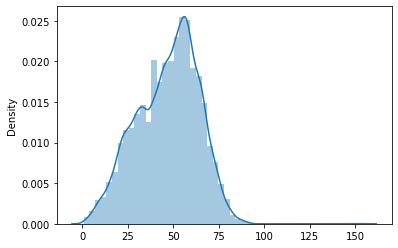

In [53]:
sns.distplot(train_age_data)

We can see that most of the data is around people who have aged near 50years

In [56]:
def return_gender(patient_id):
  train_example =  pydicom.dcmread(train_files_path+'/'+patient_id+'.dcm')
  gender = train_example[0x0010,0x0040].value
  return gender
def return_age(patient_id):
  train_example =  pydicom.dcmread(train_files_path+'/'+patient_id+'.dcm')
  age = train_example[0x0010,0x1010].value
  return age

In [57]:
train_labels_df2 = train_labels_df.copy(deep=True)
train_labels_df2.reset_index(inplace=True)
gender_data  = train_labels_df2['patientId'].apply(return_gender)
train_labels_df2['gender'] = gender_data
age_data = train_labels_df2['patientId'].apply(return_age)
train_labels_df2['age'] = age_data

In [59]:
patients_without_pnuemonia = train_labels_df2[train_labels_df2['Target']==0]
patients_with_pnuemonia = train_labels_df2[train_labels_df2['Target']==1]

In [60]:
patients_without_pnuemonia.shape

(20672, 9)

In [61]:
patients_with_pnuemonia.shape

(9555, 9)

In [62]:
patients_with_pnuemonia = patients_with_pnuemonia.drop_duplicates(subset=["patientId"])

In [63]:
patients_with_pnuemonia.describe()

,x,y,width,height,Target
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.0
mean,384.972888,376.124085,215.997172,314.209082,1.0
std,203.803120,149.373537,59.329856,154.912499,0.0
min,2.000000,2.000000,40.000000,45.000000,1.0
25%,204.000000,257.000000,174.000000,193.000000,1.0
50%,303.500000,378.000000,214.000000,282.000000,1.0
75%,590.000000,487.000000,256.000000,417.000000,1.0
max,817.000000,881.000000,528.000000,942.000000,1.0


In [64]:
patients_without_pnuemonia.describe()

,x,y,width,height,Target
count,0.0,0.0,0.0,0.0,20672.0
mean,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,0.0
max,NaN,NaN,NaN,NaN,0.0


In [65]:
20672+6012

26684

In [66]:
patients_with_pnuemonia.isna().any()

patientId    False
x            False
y            False
width        False
height       False
Target       False
class        False
gender       False
age          False
dtype: bool

In [67]:
patients_without_pnuemonia.isna().any()

patientId    False
x             True
y             True
width         True
height        True
Target       False
class        False
gender       False
age          False
dtype: bool

In [68]:
patients_with_pnuemonia.isnull().any()

patientId    False
x            False
y            False
width        False
height       False
Target       False
class        False
gender       False
age          False
dtype: bool

In [69]:
patients_without_pnuemonia.isnull().any()

patientId    False
x             True
y             True
width         True
height        True
Target       False
class        False
gender       False
age          False
dtype: bool

In [70]:
patients_with_pnuemonia.describe()

,x,y,width,height,Target
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.0
mean,384.972888,376.124085,215.997172,314.209082,1.0
std,203.803120,149.373537,59.329856,154.912499,0.0
min,2.000000,2.000000,40.000000,45.000000,1.0
25%,204.000000,257.000000,174.000000,193.000000,1.0
50%,303.500000,378.000000,214.000000,282.000000,1.0
75%,590.000000,487.000000,256.000000,417.000000,1.0
max,817.000000,881.000000,528.000000,942.000000,1.0


In [71]:
patients_without_pnuemonia.describe()

,x,y,width,height,Target
count,0.0,0.0,0.0,0.0,20672.0
mean,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,0.0
max,NaN,NaN,NaN,NaN,0.0


In [72]:
patients_with_pnuemonia.groupby('gender').count()

,patientId,x,y,width,height,Target,class,age
gender,,,,,,,,
F,2502,2502,2502,2502,2502,2502,2502,2502
M,3510,3510,3510,3510,3510,3510,3510,3510


In [73]:
patients_without_pnuemonia.groupby('gender').count()

,patientId,x,y,width,height,Target,class,age
gender,,,,,,,,
F,9016,0,0,0,0,9016,9016,9016
M,11656,0,0,0,0,11656,11656,11656


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


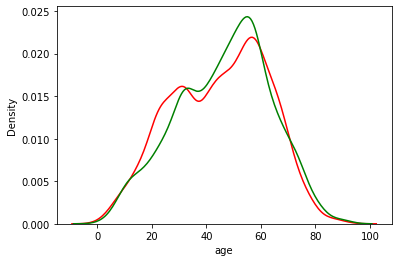

In [74]:
sns.distplot(patients_with_pnuemonia[patients_with_pnuemonia['gender']=='M']['age'],color='r',hist=False)
sns.distplot(patients_with_pnuemonia[patients_with_pnuemonia['gender']=='F']['age'],color='green',hist=False)